# Special Topic of Data Analytics Project

## Sentiment Analysis with Twitter Data

Data Loading

In [1]:
import pandas as pd
import numpy as np
raw_data = pd.read_csv("Bitcoin_tweets.csv",low_memory=False)
print(raw_data.shape)
raw_data.head(5)

C:\Users\edanu\AppData\Local\Temp\ipykernel_56044\1075755756.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(2259788, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


Data Cleaning

In [2]:
from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook, tqdm
import re

raw_data = raw_data.sort_values(by = 'date')
data = raw_data.sample(frac=0.01, replace=False, random_state=1)
data.reset_index(inplace=True)
for i,s in enumerate(tqdm(data['text'],position=0, leave=True)):
    text = str(data.loc[i, 'text'])
    text = text.replace("#", "")
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    data.loc[i, 'text'] = text
data.to_csv("Bitcoin_tweets_clean_data.csv", header=True, encoding='utf-8',index=False)

100%|██████████| 22598/22598 [00:18<00:00, 1195.46it/s]


In [3]:
clean_data = pd.read_csv("Bitcoin_tweets_clean_data.csv")
print(clean_data.shape)
clean_data.head(5)

(22598, 14)


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,195760,محمد,esfahan,‏‏‏خودت رو به خودت ثابت کن،نه به دیگران,2021-01-02 19:08:56,616.0,1683.0,1712.0,False,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter for Android,False
1,1135874,Crypto Revolution Merchandise 💚,NaN,Crypto Revolution the Wave of change 👊😎👊 Not y...,2019-10-13 06:16:05,451.0,2045.0,45077.0,False,2021-08-25 07:06:40,Long Bitcoin short the banks 🧐,['Bitcoin'],Twitter Web App,False
2,332828,STRATO฿ITZ,USA,Digital Token Entrepreneur | Top Mod @ https:/...,2014-04-25 19:40:15,468.0,111.0,1262.0,False,2021-07-02 19:37:18,Top Trending Cryptocurrency Post - DOGECOIN Se...,"['Cryptocurrency', 'Bitcoin']",IFTTT,False
3,581946,U.Today,"New York, USA",https://t.co/Tt6MRU7xb1 is an independent orga...,2018-01-17 09:28:59,35990.0,4447.0,682.0,False,2021-07-24 14:14:53,Can one expect another wave of BTC's decline s...,['BTC'],get shares,False
4,108170,Mr Fulcanelli,Argentina,"be decentralized, be a smart contract",2010-08-23 20:41:38,164.0,100.0,9295.0,False,2021-05-29 15:52:17,We will see…\n\nbitcoin btc bnb band bake $btc...,"['bitcoin', 'btc', 'bnb', 'band', 'bake']",Twitter for Mac,False


Sentiment Analysis 

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
#To calculate sentiment of the tweets 
compound = []
for i,s in enumerate(tqdm(clean_data['text'],position=0, leave=True)):
    # print(i,s)
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
clean_data["compound"] = compound
clean_data.head(5)

100%|██████████| 22598/22598 [00:06<00:00, 3492.05it/s]


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound
0,195760,محمد,esfahan,‏‏‏خودت رو به خودت ثابت کن،نه به دیگران,2021-01-02 19:08:56,616.0,1683.0,1712.0,False,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter for Android,False,0.5994
1,1135874,Crypto Revolution Merchandise 💚,NaN,Crypto Revolution the Wave of change 👊😎👊 Not y...,2019-10-13 06:16:05,451.0,2045.0,45077.0,False,2021-08-25 07:06:40,Long Bitcoin short the banks 🧐,['Bitcoin'],Twitter Web App,False,0.0000
2,332828,STRATO฿ITZ,USA,Digital Token Entrepreneur | Top Mod @ https:/...,2014-04-25 19:40:15,468.0,111.0,1262.0,False,2021-07-02 19:37:18,Top Trending Cryptocurrency Post - DOGECOIN Se...,"['Cryptocurrency', 'Bitcoin']",IFTTT,False,0.2023
3,581946,U.Today,"New York, USA",https://t.co/Tt6MRU7xb1 is an independent orga...,2018-01-17 09:28:59,35990.0,4447.0,682.0,False,2021-07-24 14:14:53,Can one expect another wave of BTC's decline s...,['BTC'],get shares,False,0.0000
4,108170,Mr Fulcanelli,Argentina,"be decentralized, be a smart contract",2010-08-23 20:41:38,164.0,100.0,9295.0,False,2021-05-29 15:52:17,We will see…\n\nbitcoin btc bnb band bake $btc...,"['bitcoin', 'btc', 'bnb', 'band', 'bake']",Twitter for Mac,False,0.0000


In [5]:
#To calculate score of each tweet with using other related columns
scores = []
for i, s in tqdm(clean_data.iterrows(), total=clean_data.shape[0],position=0, leave=True):
    try:
        scores.append(s["compound"] * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))
    except:
        scores.append(np.nan)
clean_data["score"] = scores
clean_data.head(5)

100%|██████████| 22598/22598 [00:02<00:00, 7943.31it/s] 


,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,compound,score
0,195760,محمد,esfahan,‏‏‏خودت رو به خودت ثابت کن،نه به دیگران,2021-01-02 19:08:56,616.0,1683.0,1712.0,False,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",Twitter for Android,False,0.5994,1025.108064
1,1135874,Crypto Revolution Merchandise 💚,NaN,Crypto Revolution the Wave of change 👊😎👊 Not y...,2019-10-13 06:16:05,451.0,2045.0,45077.0,False,2021-08-25 07:06:40,Long Bitcoin short the banks 🧐,['Bitcoin'],Twitter Web App,False,0.0000,0.000000
2,332828,STRATO฿ITZ,USA,Digital Token Entrepreneur | Top Mod @ https:/...,2014-04-25 19:40:15,468.0,111.0,1262.0,False,2021-07-02 19:37:18,Top Trending Cryptocurrency Post - DOGECOIN Se...,"['Cryptocurrency', 'Bitcoin']",IFTTT,False,0.2023,254.960113
3,581946,U.Today,"New York, USA",https://t.co/Tt6MRU7xb1 is an independent orga...,2018-01-17 09:28:59,35990.0,4447.0,682.0,False,2021-07-24 14:14:53,Can one expect another wave of BTC's decline s...,['BTC'],get shares,False,0.0000,0.000000
4,108170,Mr Fulcanelli,Argentina,"be decentralized, be a smart contract",2010-08-23 20:41:38,164.0,100.0,9295.0,False,2021-05-29 15:52:17,We will see…\n\nbitcoin btc bnb band bake $btc...,"['bitcoin', 'btc', 'bnb', 'band', 'bake']",Twitter for Mac,False,0.0000,0.000000


In [6]:
#To subset just tweets
from textblob import TextBlob
clean_data = clean_data.drop_duplicates()
df = clean_data.copy()
df.dropna(subset=['hashtags'], inplace=True)
df = df[['text']] 
df.columns = ['tweets']
df.head(5)

,tweets
0,nice project \n\n\n\n\n\nortcoin ort okratech ...
1,Long Bitcoin short the banks 🧐
2,Top Trending Cryptocurrency Post - DOGECOIN Se...
3,Can one expect another wave of BTC's decline s...
4,We will see…\n\nbitcoin btc bnb band bake $btc...


In [7]:
#To clean the tweets for sensitivity and polarity score
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])

from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

def data_cleaning(data):
    #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)
    #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)
    #remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)
    #tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)
    #remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    #remove Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    #joining
    return " ".join(text_cleaned)

df['cleaned_tweets'] = df['tweets'].apply(data_cleaning)
df['date'] = clean_data['date']
df['date_clean'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df.drop(columns='date',inplace=True)
df.head(5)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\edanu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edanu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweets,cleaned_tweets,date_clean
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22
1,Long Bitcoin short the banks 🧐,Long Bitcoin short bank,2021-08-25
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24
4,We will see…\n\nbitcoin btc bnb band bake $btc...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29


In [8]:
#To calculate polarity and sensitivity scores
def getSensitivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

df['sensitivity_score'] = df['cleaned_tweets'].apply(getSensitivity)
df['polarity_score'] = df['cleaned_tweets'].apply(getPolarity)
df.head(5)

,tweets,cleaned_tweets,date_clean,sensitivity_score,polarity_score
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22,1.00,0.600
1,Long Bitcoin short the banks 🧐,Long Bitcoin short bank,2021-08-25,0.35,-0.025
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02,0.40,0.250
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24,0.00,0.000
4,We will see…\n\nbitcoin btc bnb band bake $btc...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29,0.00,0.000


In [9]:
#To check tweets with final sentiment results: positive, nagetive or neutral
def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
df['sentiment'] = df['polarity_score'].apply(getSentiment)
df.head(5)

,tweets,cleaned_tweets,date_clean,sensitivity_score,polarity_score,sentiment
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22,1.00,0.600,positive
1,Long Bitcoin short the banks 🧐,Long Bitcoin short bank,2021-08-25,0.35,-0.025,negative
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02,0.40,0.250,positive
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24,0.00,0.000,neutral
4,We will see…\n\nbitcoin btc bnb band bake $btc...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29,0.00,0.000,neutral


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22420 entries, 0 to 22597
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweets             22420 non-null  object 
 1   cleaned_tweets     22420 non-null  object 
 2   date_clean         22420 non-null  object 
 3   sensitivity_score  22420 non-null  float64
 4   polarity_score     22420 non-null  float64
 5   sentiment          22420 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.2+ MB


In [11]:
df.describe()

,sensitivity_score,polarity_score
count,22420.000000,22420.000000
mean,0.346971,0.155847
std,0.307877,0.274841
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.360177,0.000000
75%,0.575000,0.300000
max,1.000000,1.000000


In [12]:
df['sentiment'].value_counts()

sentiment
positive    11118
neutral      8909
negative     2393
Name: count, dtype: int64

<AxesSubplot:xlabel='sentiment'>

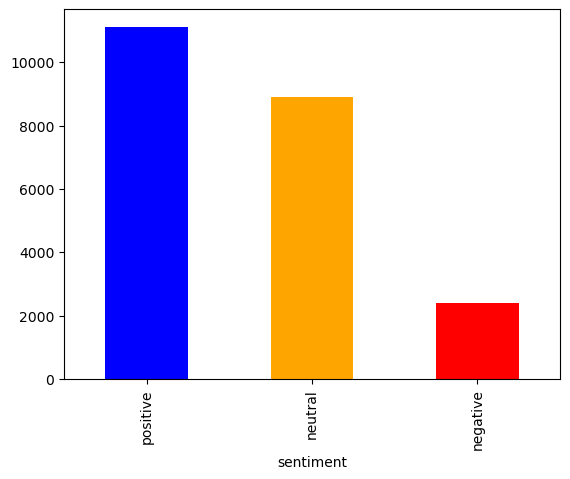

In [13]:
colors=["blue", "orange", "red"]
df['sentiment'].value_counts().plot(kind="bar", color=colors)

## LSTM Model with Yahoo Finance Data

Data Loading

In [14]:
import yfinance as yf #library for scraping Bitcoin data from Yahoo Finance
crypto_symbol = 'BTC-USD'
start_date = '2021-01-01'
end_date = '2022-01-01'
bitcoin_data = yf.download(crypto_symbol, start=start_date, end=end_date)
print(bitcoin_data.head())

C:\Users\edanu\anaconda3\envs\myenv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  31971.914062   
2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   

               Adj Close       Volume  
Date                                   
2021-01-01  29374.152344  40730301359  
2021-01-02  32127.267578  67865420765  
2021-01-03  32782.023438  78665235202  
2021-01-04  31971.914062  81163475344  
2021-01-05  33992.429688  67547324782  


Data Cleaning

In [15]:
bitcoin_data.dropna(inplace=True)
print(bitcoin_data.head())

                    Open          High           Low         Close  \
Date                                                                 
2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  31971.914062   
2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   

               Adj Close       Volume  
Date                                   
2021-01-01  29374.152344  40730301359  
2021-01-02  32127.267578  67865420765  
2021-01-03  32782.023438  78665235202  
2021-01-04  31971.914062  81163475344  
2021-01-05  33992.429688  67547324782  


<AxesSubplot:xlabel='Date'>

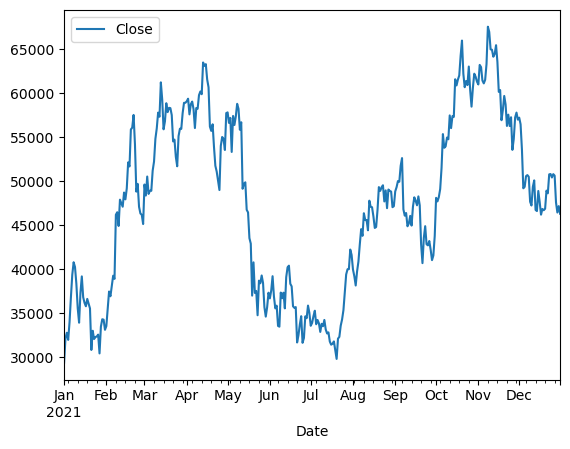

In [16]:
bitcoin_datas=pd.DataFrame(bitcoin_data,columns=['Close'])
bitcoin_datas.plot(kind="line")

In [17]:
bitcoin_data=pd.DataFrame(bitcoin_data,columns=['Close', 'Volume'])
bitcoin_data.head(5)
bitcoin_data.tail()

,Close,Volume
Date,,
2021-12-27,50640.417969,24324345758
2021-12-28,47588.855469,33430376883
2021-12-29,46444.710938,30049226299
2021-12-30,47178.125000,26686491018
2021-12-31,46306.445312,36974172400


In [18]:
#getting tweets data
df2=pd.DataFrame(df,columns=['date_clean','sensitivity_score','polarity_score'])
df2['Date']=pd.to_datetime(df2['date_clean'])
df2=pd.DataFrame(df2,columns=['Date','sensitivity_score','polarity_score'])
df2.sort_values(by=['Date'], inplace=True)
df2.head(5)

,Date,sensitivity_score,polarity_score
16712,2021-02-05,1.0,0.3
1754,2021-02-05,0.4,-0.3
3305,2021-02-05,1.0,0.8
17120,2021-02-05,0.0,0.0
17657,2021-02-05,0.0,0.0


In [19]:
#filling multiple values with the mean of the day
df_grouped = df2.groupby('Date').mean().reset_index()
df_grouped.head(5)

,Date,sensitivity_score,polarity_score
0,2021-02-05,0.355527,0.092432
1,2021-02-06,0.185700,0.095254
2,2021-02-07,0.347817,0.142262
3,2021-02-08,0.195150,0.078930
4,2021-02-09,0.195048,0.047330


In [20]:
#merging both dataframes
merged_data= pd.merge(bitcoin_data,df_grouped, how='left', on='Date')
merged_data.head(5)

,Date,Close,Volume,sensitivity_score,polarity_score
0,2021-01-01,29374.152344,40730301359,NaN,NaN
1,2021-01-02,32127.267578,67865420765,NaN,NaN
2,2021-01-03,32782.023438,78665235202,NaN,NaN
3,2021-01-04,31971.914062,81163475344,NaN,NaN
4,2021-01-05,33992.429688,67547324782,NaN,NaN


In [21]:
merged_data.tail()

,Date,Close,Volume,sensitivity_score,polarity_score
360,2021-12-27,50640.417969,24324345758,NaN,NaN
361,2021-12-28,47588.855469,33430376883,NaN,NaN
362,2021-12-29,46444.710938,30049226299,0.280047,0.068538
363,2021-12-30,47178.125000,26686491018,0.356053,0.156598
364,2021-12-31,46306.445312,36974172400,NaN,NaN


In [22]:
#filling nan values with neutral, because filling with mean results high errors
merged_data_filled=merged_data.fillna(0)
merged_data_filled.head(5)

,Date,Close,Volume,sensitivity_score,polarity_score
0,2021-01-01,29374.152344,40730301359,0.0,0.0
1,2021-01-02,32127.267578,67865420765,0.0,0.0
2,2021-01-03,32782.023438,78665235202,0.0,0.0
3,2021-01-04,31971.914062,81163475344,0.0,0.0
4,2021-01-05,33992.429688,67547324782,0.0,0.0


In [23]:
merged_data_filled = merged_data_filled.set_index(pd.DatetimeIndex(merged_data_filled['Date']))
merged_data_filled = merged_data_filled.drop(['Date'], axis=1)
merged_data_filled.head(5)

,Close,Volume,sensitivity_score,polarity_score
Date,,,,
2021-01-01,29374.152344,40730301359,0.0,0.0
2021-01-02,32127.267578,67865420765,0.0,0.0
2021-01-03,32782.023438,78665235202,0.0,0.0
2021-01-04,31971.914062,81163475344,0.0,0.0
2021-01-05,33992.429688,67547324782,0.0,0.0


In [24]:
merged_data_filled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2021-01-01 to 2021-12-31
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Close              365 non-null    float64
 1   Volume             365 non-null    int64  
 2   sensitivity_score  365 non-null    float64
 3   polarity_score     365 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 14.3 KB


LSTM Model

In [25]:
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#  transforms time series data into a format suitable for supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [26]:
# scale the dataset to a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(merged_data_filled.values)

#considering the specified number of days to look back
n_days = 3 #adding 3 days lags creating number of observations 
n_features = 4 #Features in the dataset.
n_obs = n_days*n_features

reframed = series_to_supervised(scaled, n_days, 1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
3,0.000000,0.066056,0.0,0.172736,0.072085,0.147744,0.0,0.172736,0.089228,0.180255,0.0,0.172736,0.068017,0.187776,0.0,0.172736
4,0.072085,0.147744,0.0,0.172736,0.089228,0.180255,0.0,0.172736,0.068017,0.187776,0.0,0.172736,0.120920,0.146786,0.0,0.172736
5,0.089228,0.180255,0.0,0.172736,0.068017,0.187776,0.0,0.172736,0.120920,0.146786,0.0,0.172736,0.195069,0.170093,0.0,0.172736
6,0.068017,0.187776,0.0,0.172736,0.120920,0.146786,0.0,0.172736,0.195069,0.170093,0.0,0.172736,0.261749,0.198610,0.0,0.172736
7,0.120920,0.146786,0.0,0.172736,0.195069,0.170093,0.0,0.172736,0.261749,0.198610,0.0,0.172736,0.299101,0.208681,0.0,0.172736


In [27]:
#the training set as 60% and 40% testing set 
values = reframed.values
total_data_points = len(values)
# Calculate the split index
n_train_days = int(total_data_points * 0.6)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
train.shape

(217, 16)

In [28]:
# split into train and test
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [29]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(217, 3, 4) (217,) (145, 3, 4) (145,)


In [30]:
# design network
model = Sequential()
model.add(LSTM(10, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=6, validation_data=(test_X, test_y), verbose=2, shuffle=False,validation_split=0.2)

Epoch 1/50
37/37 - 7s - loss: 0.2540 - val_loss: 0.3110 - 7s/epoch - 186ms/step
Epoch 2/50
37/37 - 0s - loss: 0.1910 - val_loss: 0.2084 - 263ms/epoch - 7ms/step
Epoch 3/50
37/37 - 0s - loss: 0.1624 - val_loss: 0.1750 - 201ms/epoch - 5ms/step
Epoch 4/50
37/37 - 0s - loss: 0.1379 - val_loss: 0.1402 - 206ms/epoch - 6ms/step
Epoch 5/50
37/37 - 0s - loss: 0.1126 - val_loss: 0.1211 - 321ms/epoch - 9ms/step
Epoch 6/50
37/37 - 0s - loss: 0.0939 - val_loss: 0.0937 - 305ms/epoch - 8ms/step
Epoch 7/50
37/37 - 0s - loss: 0.0811 - val_loss: 0.0776 - 214ms/epoch - 6ms/step
Epoch 8/50
37/37 - 0s - loss: 0.0708 - val_loss: 0.0617 - 238ms/epoch - 6ms/step
Epoch 9/50
37/37 - 0s - loss: 0.0643 - val_loss: 0.0612 - 321ms/epoch - 9ms/step
Epoch 10/50
37/37 - 0s - loss: 0.0612 - val_loss: 0.0598 - 221ms/epoch - 6ms/step
Epoch 11/50
37/37 - 0s - loss: 0.0596 - val_loss: 0.0577 - 200ms/epoch - 5ms/step
Epoch 12/50
37/37 - 0s - loss: 0.0583 - val_loss: 0.0575 - 205ms/epoch - 6ms/step
Epoch 13/50
37/37 - 0s - l

In [32]:
# prediction
predict_test_X = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_days* n_features,))
# invert scaling for forecast
prediction = concatenate((predict_test_X, test_X[:, -3:]), axis=1)
prediction = scaler.inverse_transform(prediction)
prediction = prediction[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
actual = concatenate((test_y, test_X[:, -3:]), axis=1)
actual = scaler.inverse_transform(actual)
actual = actual[:,0]

5/5 [==============================] - 2s 2ms/step


Model Evaluation

In [33]:
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

mse = (mean_squared_error(actual, prediction))
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(actual, prediction))
print('Test RMSE: %.3f' % rmse)
mae = (mean_absolute_error(actual, prediction))
print('Test MAE: %.3f' % mae)
r2 = (r2_score(actual, prediction))
print('Test R2: %.3f' % r2)
percent_errors = abs((actual-prediction)*100/actual)
print('Average Percentage Error between the Actual and the Predicted Price: ', percent_errors.mean(),'%')

Test MSE: 5387761.845
Test RMSE: 2321.155
Test MAE: 1868.416
Test R2: 0.886
Average Percentage Error between the Actual and the Predicted Price:  3.5573628418575662 %


In [34]:
def calculate_custom_accuracy(actuals, predictions, tolerance=0.1):
    
    # Calculate the absolute difference between actuals and predictions
    absolute_difference = np.abs(actuals - predictions)
    
    # Calculate the allowed difference based on the tolerance
    allowed_difference = tolerance * actuals
    
    # Determine which predictions are within the allowed difference
    accurate_predictions = absolute_difference <= allowed_difference
    
    # Calculate the accuracy
    accuracy = np.mean(accurate_predictions) * 100  # Convert to percentage
    return accuracy

# Example usage
accuracy = calculate_custom_accuracy(actual, prediction, tolerance=0.1)
print('Custom Accuracy: %.2f%%' % accuracy)

Custom Accuracy: 97.24%


Prediction Visualization

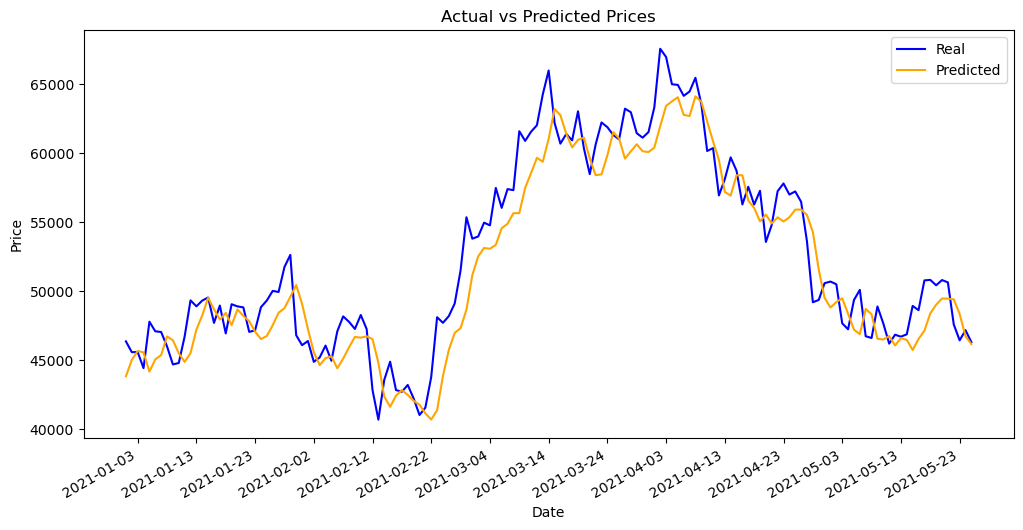

In [46]:
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

days= 145
start_date = datetime.strptime("2021-01-01", "%Y-%m-%d")
date_range = [start_date + timedelta(days=x) for x in range(days)]

plt.figure(figsize=(12, 6))

# Plot the actual and predicted values
plt.plot(date_range, actual, label='Real', color='blue')
plt.plot(date_range, prediction, label='Predicted', color='orange')

# Formatting the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10)) 
plt.gcf().autofmt_xdate()  # Auto rotate date labels

# Adding the title and labels for axes
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Show legend
plt.legend()
plt.show()